In [30]:
import json

# Data to be written
data = {
    "intents":
  [
    {
      "tag":"greeting",
      "input":["hello","meow meow","nice to meet you","Henlo","hi, is this is the PAWS club","any pups here ?","hi","hey there","hey","hi there","hi, nice to meet you","hello there","anyone there ?","hello puppers","woof woof"],
      "responses":[
          "Hi. Welcome to the PAWS club",
          "Hey yo, do you need help ?",
          "welcome aboard, how may I help you ?",
          "ahoy!!",
          "you notty bvuoy"
          "Hi random person, what do'ya want ?",
          "Hello my friend, How can I help you ?",
          "Ha , Glad you showed up. How are you ?"
        ]
    },
    {
      "tag":"goodbye",
      "input":["Thank you","Thanks","Thanks for the info","bye","byr bro","adios","okay bye","goodbye","see you later","i will catch you later","i will catch up later","okay i will see you later","I will talk to you later","will text you later","Auf Wiedersehen","Bye brother"],
      "responses":[
          "Okay, Bye",
          "Have a nice day",
          "Adios",
          "Goodbye",
          "see you later",
          "nice conversation. bye",
          "okay. Have a nice day",
          "Take care",
          "we'll meet soon",
          "Auf Wiedersehen",
          "Okay , Take care"
        ]
    },
    {
      "tag":"howami",
      "input":["how are you ?","I am fine , how are you ?","are you fine ?","how are things going on ?","everything going on okay ?","how's everything there ?","how's everything going on ?","is everything okay ?"],
      "responses":[
          "Yeah , am fine",
          "Everything's going on well",
          "Doing good.Thanks you are my best friend",
          "Things are Great",
          "Yeah Fine, nothing much going on in my life",
          "I am Great , wanna join the PAWS club ?",
          "Everything's great.",
          "I am doing good. Life is boring. need to go on an adventure"
        ]
    },
    {
      "tag":"whoareyou",
    "input":["who are you ?","what are you ?","what is your name ?","are you a chatbot ?","what can I call you ?","your name ?","are you a bot ?","how do I address you ?","How do I call you"],
      "responses":[
          "I am a Rottweiler Bot , you can call me Shadow",
          "I am Shadow and you could ask me questions about our club",
          "Shadow at your service",
          "My name is Shadow and yes, I am the G.O.A.T",
          "You can call me Shadoooww!! and I am here to Help you",
          "My name is Shadow and I am here to answer your questions regarding our club. go ahead and shoot"
        ]
    },
    {
      "tag":"join",
      "input":["how to get recruited ?","how to join ?","how do i get recruited ?","How to join PAWS ?","how do I join the club ?","how to join the PAWS club ?","how to enroll","how to join the organization","steps to join the organization","steps to join the club"],
      "responses":[

        "you need to start barking as loud as you can when the hoomans are asleep, once you have completed the pre-requisites",
        "eat that chimken off the hoomans plate when they're not looking",
        "well, there are some pre-requisite and after you complete them, I'll get back to you in a woof"

      ]
    },
    {
      "tag":"prerequisites",
      "input":["what are the pre requisites ?","what are the pre-requisites ?","tell me about the pre-requisites","tell me more about the pre requisites","give more details about the pre-requisites","What are the requirements"," what's the basic requirements","what do I need to join the club ?"],
      "responses":[
        "you love going on walks, you have sharp lil teef, you sleep all day ",
        "you boop your hooman's nose everyday",
        "You're a hooman",
        "You're a cute lil pupper like me", 
        "You're a chimken lover "
        "You're a good boi"
      ]
    }
  ]
}

json_string = json.dumps(data)
print(json_string)



{"intents": [{"tag": "greeting", "input": ["hello", "meow meow", "nice to meet you", "Henlo", "hi, is this is the PAWS club", "any pups here ?", "hi", "hey there", "hey", "hi there", "hi, nice to meet you", "hello there", "anyone there ?", "hello puppers", "woof woof"], "responses": ["Hi. Welcome to the PAWS club", "Hey yo, do you need help ?", "welcome aboard, how may I help you ?", "ahoy!!", "you notty bvuoyHi random person, what do'ya want ?", "Hello my friend, How can I help you ?", "Ha , Glad you showed up. How are you ?"]}, {"tag": "goodbye", "input": ["Thank you", "Thanks", "Thanks for the info", "bye", "byr bro", "adios", "okay bye", "goodbye", "see you later", "i will catch you later", "i will catch up later", "okay i will see you later", "I will talk to you later", "will text you later", "Auf Wiedersehen", "Bye brother"], "responses": ["Okay, Bye", "Have a nice day", "Adios", "Goodbye", "see you later", "nice conversation. bye", "okay. Have a nice day", "Take care", "we'll me

In [31]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [32]:
with open('json_data.json', 'w') as outfile:
    json.dump(json_string, outfile)
  
# Using a JSON string
with open('json_data.json', 'w') as outfile:
    outfile.write(json_string)

In [33]:
with open('json_data.json') as content:
  data1 = json.load(content)

In [34]:
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [35]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [36]:
data

,inputs,tags
0,hello,greeting
1,meow meow,greeting
2,nice to meet you,greeting
3,Henlo,greeting
4,"hi, is this is the PAWS club",greeting
...,...,...
61,tell me more about the pre requisites,prerequisites
62,give more details about the pre-requisites,prerequisites
63,What are the requirements,prerequisites
64,what's the basic requirements,prerequisites


In [37]:
data = data.sample(frac=1)

In [38]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
50,how do i get recruited,join
64,whats the basic requirements,prerequisites
46,how do i address you,whoareyou
65,what do i need to join the club,prerequisites
55,how to join the organization,join
...,...,...
9,hi there,greeting
7,hey there,greeting
1,meow meow,greeting
19,byr bro,goodbye


In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [40]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [41]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  81
output length:  6


In [42]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [43]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [44]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 7ms/step - loss: 1.7909 - accuracy: 0.1364
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7875 - accuracy: 0.2879
Epoch 3/200
3/3 [==============================] - 0s 6ms/step - loss: 1.7847 - accuracy: 0.2424
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7824 - accuracy: 0.3030
Epoch 5/200
3/3 [==============================] - 0s 9ms/step - loss: 1.7795 - accuracy: 0.3636
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 1.7769 - accuracy: 0.3939
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 1.7745 - accuracy: 0.4242
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 1.7720 - accuracy: 0.4242
Epoch 9/200
3/3 [==============================] - 0s 6ms/step - loss: 1.7696 - accuracy: 0.4091
Epoch 10/200
3/3 [==============================] - 0s 6ms/step - loss: 1.7667 - accuracy: 0.3939
Epoch 11/200
3/3 [===========

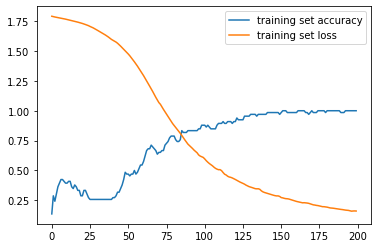

In [45]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [46]:
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Shadow : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : Hi
Shadow :  Hey yo, do you need help ?
You : how are you?
Shadow :  Yeah Fine, nothing much going on in my life
You : who are you?
Shadow :  You can call me Shadoooww!! and I am here to Help you
You : how to join?
Shadow :  you need to start barking as loud as you can when the hoomans are asleep, once you have completed the pre-requisites
You : what are the pre-requisites?
Shadow :  You're a chimken lover You're a good boi
You : what is your name?
Shadow :  My name is Shadow and I am here to answer your questions regarding our club. go ahead and shoot
You : adios
Shadow :  Okay , Take care
